### KÜTÜPHANELERİN YÜKLENMESİ

In [58]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

# Matplotlib Türkçe karakter desteği
plt.rcParams["font.family"] = "DejaVu Sans"

#### GİRİŞ BİLGİSİ

In [59]:

print("###############################################################")
print("#   ÜSKÜDAR ÜNİVERSİTESİ FEN BİLİMLERİ ENSTİTÜSÜ              #")
print("#   MAKİNE ÖĞRENMESİ - ARA SINAV ÖDEVİ                        #")
print("#                                                             #")
print("#   KURU FASULYE VERİ SETİ ÜZERİNDE MAKİNE ÖĞRENMESİ          #")
print("#   PREPROCESSING, FEATURE EXTRACTION VE MODEL EVALUATION      #")
print("###############################################################")

###############################################################
#   ÜSKÜDAR ÜNİVERSİTESİ FEN BİLİMLERİ ENSTİTÜSÜ              #
#   MAKİNE ÖĞRENMESİ - ARA SINAV ÖDEVİ                        #
#                                                             #
#   KURU FASULYE VERİ SETİ ÜZERİNDE MAKİNE ÖĞRENMESİ          #
#   PREPROCESSING, FEATURE EXTRACTION VE MODEL EVALUATION      #
###############################################################


#### Ana Amaç
Ana hedef, fasulye çeşitliliği içindeki doğal örüntüleri kategorize etmek ve anlamaktır. Makine öğrenimi algoritmalarını kullanarak, alan, çevre ve şekil gibi özelliklere dayalı olarak fasulyeler arasındaki doğal gruplandırmaları ve ilişkileri belirlemeyi hedefliyoruz.

### VERİ SETİNİN YÜKLENMESİ VE EDA-KEŞİFSEL VERİ ANALİZİ

In [60]:
print("\n1. VERİ SETİNİN YÜKLENMESİ VE KEŞİFSEL ANALİZİ")
print("------------------------------------------------")
print("Birleşmiş Milletler Gıda ve Tarım Örgütü'ne (FAO) göre, fasulye dünya genelinde 400 milyondan fazla")
print("insanın temel besin kaynağıdır. Sadece ABD'de, 1.5 milyon akrelik arazide fasulye yetiştirilmekte ve")
print("yıllık 2.2 milyar pound fasulye üretilmektedir.")
print("\nBu çalışmada, 7 farklı kuru fasulye türünü sınıflandırmak için makine öğrenmesi pipeline'ı geliştirilecektir.")

df = pd.read_excel("Dry_Bean_Dataset.xlsx")

print(f"\nVeri seti boyutu: {df.shape}")



1. VERİ SETİNİN YÜKLENMESİ VE KEŞİFSEL ANALİZİ
------------------------------------------------
Birleşmiş Milletler Gıda ve Tarım Örgütü'ne (FAO) göre, fasulye dünya genelinde 400 milyondan fazla
insanın temel besin kaynağıdır. Sadece ABD'de, 1.5 milyon akrelik arazide fasulye yetiştirilmekte ve
yıllık 2.2 milyar pound fasulye üretilmektedir.

Bu çalışmada, 7 farklı kuru fasulye türünü sınıflandırmak için makine öğrenmesi pipeline'ı geliştirilecektir.

Veri seti boyutu: (13611, 17)


In [61]:
df.head() # ilk 5 veri

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [62]:
df.sample(10) # rastgele 10 örnek.

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
12411,34248,693.987,268.956189,162.350167,1.656643,0.797264,34549,208.820277,0.714766,0.991288,0.893598,0.776410,0.007853,0.001760,0.602812,0.998645,DERMASON
12590,34951,694.086,257.090664,173.330663,1.483238,0.738548,35319,210.952590,0.733171,0.989581,0.911681,0.820538,0.007356,0.002057,0.673282,0.998638,DERMASON
531,36565,691.737,242.283745,192.328492,1.259739,0.608159,36892,215.768404,0.752057,0.991136,0.960270,0.890561,0.006626,0.002571,0.793099,0.999097,SEKER
2792,71475,1051.294,378.284523,241.795075,1.564484,0.769050,72499,301.670013,0.783168,0.985876,0.812673,0.797469,0.005293,0.001320,0.635956,0.994943,BARBUNYA
1943,49363,816.683,280.621641,224.289272,1.251159,0.600987,49830,250.700865,0.753507,0.990628,0.930046,0.893377,0.005685,0.002234,0.798122,0.998578,SEKER
1688,44466,760.049,269.483616,210.268173,1.281619,0.625451,44807,237.940895,0.770534,0.992390,0.967286,0.882951,0.006060,0.002272,0.779603,0.999154,SEKER
11455,30471,655.561,247.903301,156.845945,1.580553,0.774405,30957,196.969242,0.761508,0.984301,0.890985,0.794541,0.008136,0.002000,0.631295,0.997795,DERMASON
8245,42348,775.415,288.483371,187.629638,1.537515,0.759592,42959,232.204970,0.694138,0.985777,0.885063,0.804916,0.006812,0.001764,0.647890,0.996141,SIRA
4242,68634,1007.249,385.360999,229.423820,1.679690,0.803468,70059,295.613807,0.724431,0.979660,0.850111,0.767109,0.005615,0.001199,0.588456,0.988424,CALI
13415,39823,725.562,260.318756,195.118759,1.334155,0.661961,40183,225.175972,0.763010,0.991041,0.950593,0.865001,0.006537,0.002257,0.748227,0.998251,DERMASON


In [63]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

#### Veri Seti Analizi

Yukarıdaki bilgilere dayanarak, veri seti hakkında şu çıkarımları yapabiliriz:

* **Veri Özellikleri:** Veri seti, fasulye tanelerinin alan, çevre, eksen uzunlukları, en-boy oranı, dış merkezlilik, dışbükeylik ve yuvarlaklık gibi çeşitli özelliklerini içermektedir. Bu özellikler, belirli bir taneyi spesifik bir fasulye türüne sınıflandırmada önemli bilgi kaynağıdır.

* **Veri Tamlığı:** 'Non-Null Count' sütununun gösterdiği gibi veri setinde eksik değer bulunmamaktadır. Bu, araştırmamızda eksik veya tamamlanmamış kayıtlar için veri temizleme ihtiyacını ortadan kaldırır. (Ancak ödev kapsamında yapay olarak eksik değerler ekleyerek veri ön işleme tekniklerini uygulayacağız.)

* **Veri Tipleri:** Veri setinin çoğunluğu sayısal verilerden oluşurken, yalnızca 'Class' özelliği fasulye kategorisini içeren kategorik bir değişkendir.

Bu analizler ışığında, veri setinin makine öğrenmesi modelleri için uygun olduğunu ve çeşitli sınıflandırma algoritmaları ile fasulye türlerini başarıyla ayırt edebileceğimizi öngörebiliriz.

In [65]:
# Sınıf dağılımı
class_distribution = df['Class'].value_counts()

class_distribution

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

Veri setinde dengeli olmayan (unbalanced) bir sınıf dağılımı olduğu görülmektedir. DERMASON türü en yüksek örnek sayısına sahipken (3546), BOMBAY türü en düşük örnek sayısına sahiptir (522).
En çok örneğe sahip sınıf (DERMASON) ile en az örneğe sahip sınıf (BOMBAY) arasında yaklaşık 7 katlık bir fark vardır.
Bu dengesizlik, model eğitimi sırasında sınıflandırma performansını etkileyebilir. Özellikle model, örnek sayısı daha fazla olan DERMASON sınıfına yanlılık gösterebilir ve örnek sayısı az olan BOMBAY sınıfını tanımakta zorlanabilir.
Bu dengesizliği ele almak için şu teknikler düşünülebilir:

Sınıf ağırlıklandırma (class weighting)
Veri çoğaltma (data augmentation)
SMOTE gibi oversampling teknikleri
Undersampling teknikleri



Ancak bu ödev kapsamında, sınıf dengesizliğine rağmen modellerin performansını değerlendirmek ve nested cross-validation ile bu etkiyi azaltmak amaçlanmaktadır.

### Veri Görselleştirme - Sınıf Dağılımı

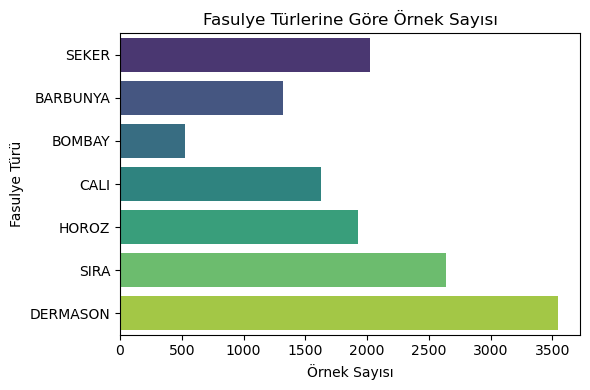

In [87]:
 # Sınıf dağılımını görselleştirme
plt.figure(figsize=(6, 4))
sns.countplot(y='Class', data=df, palette='viridis')
plt.title('Fasulye Türlerine Göre Örnek Sayısı')
plt.xlabel('Örnek Sayısı')
plt.ylabel('Fasulye Türü')
plt.tight_layout()
plt.show()


### Temel İstatistikler ve Özellik Dağılımları

In [88]:
# İstatistiksel bilgiler
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


Ölçekleme İhtiyacı: Özelliklerin değer aralıkları arasında büyük farklılıklar olduğundan, makine öğrenmesi modellerinden önce standartlaştırma veya normalizasyon gereklidir.
Özellik Seçimi: Bu kadar çok özellik arasında, PCA ve LDA gibi boyut indirgeme tekniklerinin uygulanması, veri temsilini daha kompakt hale getirebilir.
Özellik Korelasyonu: Alan, çevre ve eksen uzunlukları gibi bazı özellikler arasında muhtemelen yüksek korelasyon vardır. Bu ilişkiler korelasyon analizi veya VIF (Variance Inflation Factor) ile incelenmelidir.

Bu temel istatistikler, fasulye türlerinin boyut ve şekil açısından önemli ölçüde farklılaştığını gösteriyor, bu da makine öğrenmesi sınıflandırma modellerinin başarılı olma potansiyeline işaret ediyor.

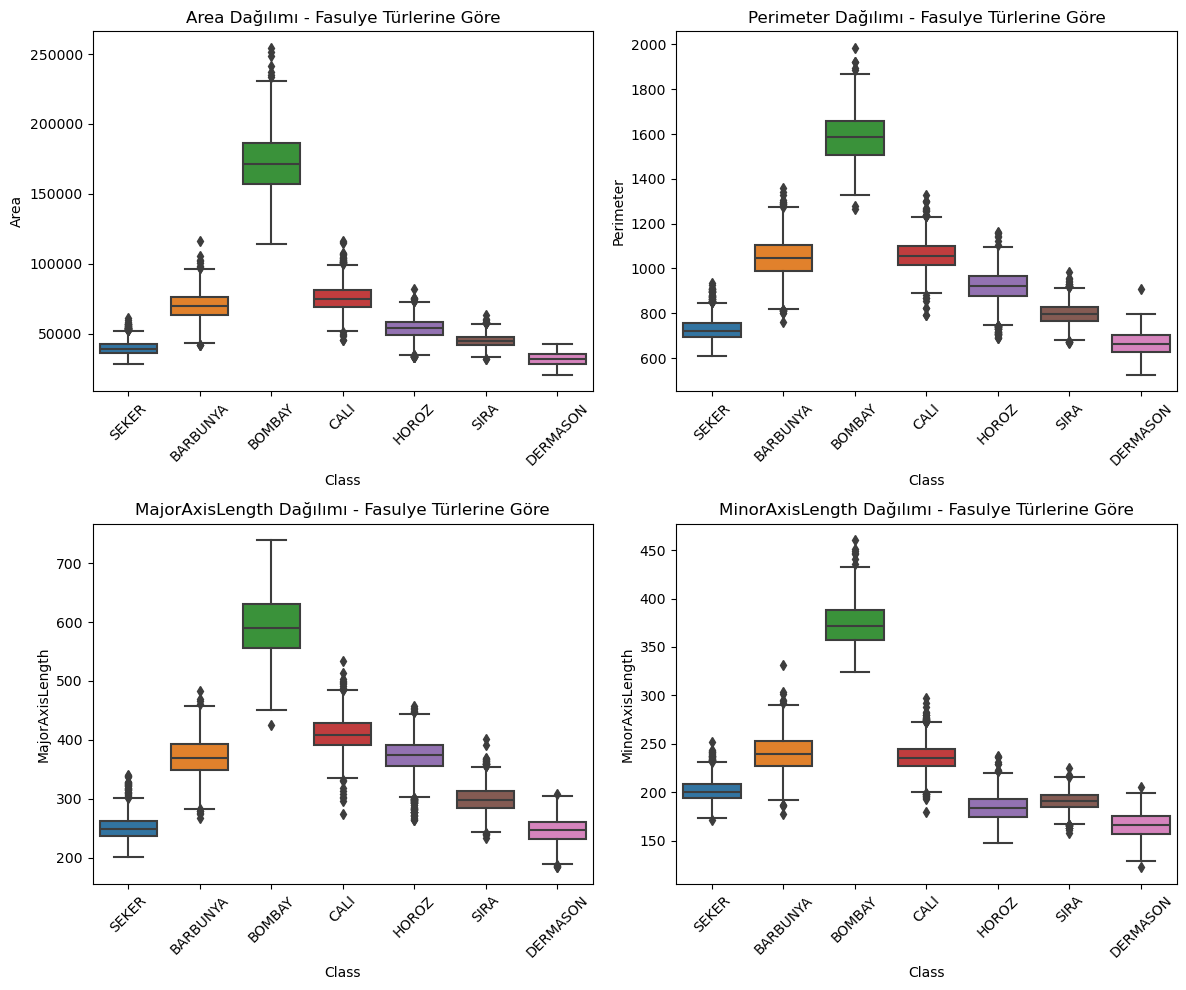

In [68]:
# Öznitelikler ve hedef değişken arasındaki ilişkileri inceleme
plt.figure(figsize=(12, 10))
for i, feature in enumerate(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} Dağılımı - Fasulye Türlerine Göre')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Özellikle 4 temel özellik (Alan, Çevre, Ana Eksen ve Yan Eksen Uzunlukları) açısından türler arasındaki farklılıklar dikkat çekicidir:
Alan (Area) Dağılımı:

* BOMBAY türü, diğer türlere göre açık ara en büyük alana sahip (median ~175,000 birim²)
* DERMASON en küçük alana sahip (median ~30,000 birim²)
* BARBUNYA, CALI ve HOROZ orta büyüklükte alanlar gösteriyor

Çevre (Perimeter) Dağılımı:

* BOMBAY en uzun çevreye sahip (median ~1600 birim)
* DERMASON ve SEKER en kısa çevreye sahip (median ~650-750 birim)
* BARBUNYA ve CALI benzer çevre uzunluklarına sahip

Ana Eksen Uzunluğu (MajorAxisLength) Dağılımı:

* Yine BOMBAY en uzun ana eksene sahip (median ~600 birim)
* DERMASON ve SEKER en kısa ana eksene sahip
* Diğer türler ara değerlerde ve birbirlerinden ayrılabilir durumda

Yan Eksen Uzunluğu (MinorAxisLength) Dağılımı:

* BOMBAY türü en geniş (median ~370 birim)
* DERMASON en dar yapıda (median ~170 birim)

Genel Gözlemler:

* Ayırt Edici Türler: BOMBAY ve DERMASON, boyut özellikleri açısından diğer türlerden belirgin şekilde ayrılıyor
* Sınıflandırma Potansiyeli: Bu fiziksel özelliklerin, fasulye türlerini sınıflandırmada oldukça etkili olabileceği görülüyor
* Varyans Düzeyi: Her tür içinde özellik değerlerinde farklı düzeylerde varyasyon görülüyor; bazı türler daha homojen (DERMASON), bazıları daha heterojen (CALI)

Bu görsel analiz, makine öğrenmesi modellerinin fasulye türlerini ayırt etmede başarılı olabileceğini gösteriyor, çünkü türler arasında belirgin fiziksel farklılıklar mevcut.

### Korelasyon Analizi

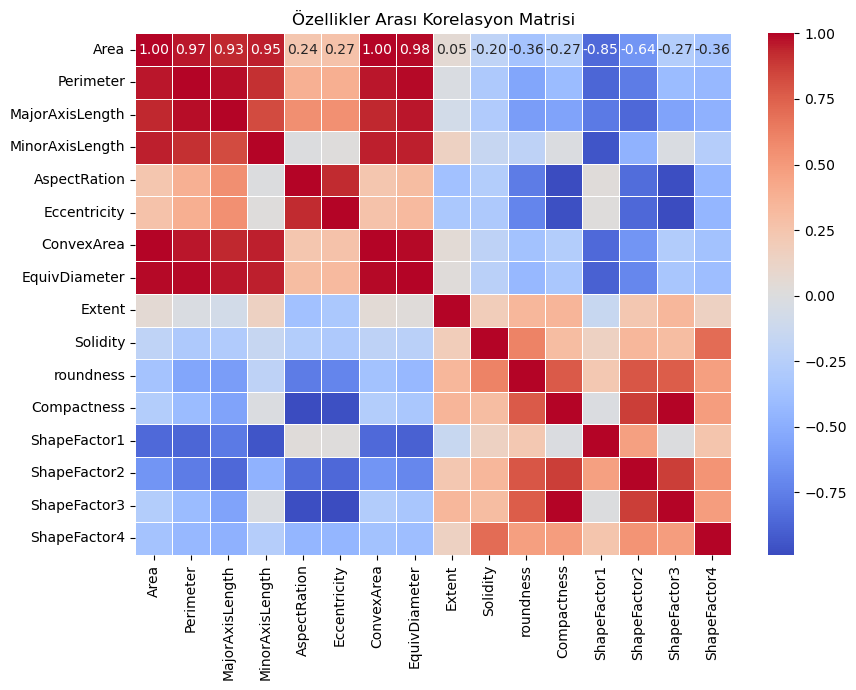

In [69]:
# Özellikler arası korelasyon analizi
correlation_matrix = df.drop('Class', axis=1).corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Özellikler Arası Korelasyon Matrisi')
plt.tight_layout()
plt.show()


Kırmızı tonlar pozitif korelasyonu, mavi tonlar negatif korelasyonu ifade eder.

* Önemli Korelasyon Grupları:

* Boyut Ölçüleri Grubu (Yüksek Pozitif Korelasyon):

Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea ve EquivDiameter özellikleri arasında çok yüksek pozitif korelasyon (0.93-1.00) görülmektedir.
Bu özellikler fasulye tanelerinin genel boyutuyla ilgilidir ve birbirleriyle doğal olarak ilişkilidir.
Bu yüksek korelasyon, boyut ölçüm özelliklerinde belirgin bir çoklu doğrusallık (multicollinearity) olduğunu gösterir.

* Şekil Ölçüleri Grubu:

AspectRatio ve Eccentricity arasında güçlü pozitif korelasyon (0.91) vardır - her ikisi de fasulye şeklinin oval/uzunluk özelliklerini ölçer.
Roundness, Compactness ve ShapeFactor özellikleri arasında orta-yüksek pozitif korelasyonlar görülmektedir.

* Boyut ve Şekil Arasındaki Negatif İlişkiler:

Boyut ölçüleri (Area, Perimeter) ile şekil ölçüleri (Roundness, Compactness) arasında orta düzeyde negatif korelasyonlar (-0.2 ile -0.4 arası) vardır.
Bu, büyük fasulyelerin genel olarak daha az dairesel/kompakt olma eğiliminde olduğunu gösterir.

* ShapeFactor Özellikleri:

ShapeFactor1-4 özellikleri kendi aralarında pozitif korelasyonlar gösterirken, boyut ölçüleriyle negatif korelasyonlar gösterirler.
Özellikle ShapeFactor2 ve ShapeFactor4, diğer şekil faktörleriyle güçlü ilişkiler sergiler.

* Makine Öğrenmesi İçin Çıkarımlar:

* Boyut İndirgeme Potansiyeli: Yüksek korelasyonlu özellikler, PCA gibi boyut indirgeme tekniklerinin etkili olabileceğini gösterir - özellikle boyut ölçüm özellikleri için.
* Özellik Seçimi: Tüm boyut özelliklerini (Area, Perimeter vb.) kullanmak yerine, aralarından sadece 1-2 tanesini seçmek yeterli olabilir.
* Çoklu Doğrusallık: Bu kadar yüksek korelasyonlu özellikler, Logistic Regression gibi bazı modellerde sorun yaratabilir.
* Bilgi Çeşitliliği: Veri setinde hem boyut hem de şekil özellikleri bulunduğundan, farklı türdeki fasulyeleri ayırt etmek için tamamlayıcı bilgiler sağlanmaktadır.

 Bu korelasyon analizi, fasulye türlerini sınıflandırırken hangi özelliklerin benzer bilgiler taşıdığını ve hangi özellik gruplarının birbirinden bağımsız olduğunu anlamamıza yardımcı olur. PCA uygulamasının bu veri seti için mantıklı olduğunu teyit etmektedir.

#### Ek not (Çoklu Doğrusallık)

Çoklu doğrusallık (multicollinearity), bir istatistiksel model veya makine öğrenmesi modelinde, bağımsız değişkenler (özellikler) arasında yüksek korelasyon olması durumudur. 

Bu durumda, boyut ölçüleri grubu (Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea ve EquivDiameter) arasındaki korelasyonların 0.93-1.00 gibi çok yüksek değerlerde olması, bu değişkenlerin birbirleriyle çok güçlü ilişkili olduğunu gösteriyor.

Çoklu doğrusallığın etkileri:

1. **Model yorumlanabilirliğini zorlaştırır**: Yüksek korelasyonlu değişkenler, bir değişkenin etkisini diğerinden ayırt etmeyi zorlaştırır.

2. **Bazı algoritmalarda kararsızlık yaratır**: Özellikle doğrusal regresyon veya lojistik regresyon gibi modellerde, çoklu doğrusallık parametre tahminlerini kararsız hale getirebilir.

3. **Gereksiz hesaplama yükü oluşturur**: Aynı bilgiyi taşıyan birden fazla değişken, modelin karmaşıklığını gereksiz yere artırır.

Örneğin, fasulye veri setinde Area (Alan) ve Perimeter (Çevre) arasında 0.97 korelasyon var. Bu, bir fasulyenin alanını bildiğimizde, çevresini de çok yüksek doğrulukla tahmin edebileceğimiz anlamına gelir. Bu nedenle, her iki özelliği de modele dahil etmek yerine, sadece birini kullanmak veya PCA gibi tekniklerle bu özellikleri daha az sayıda bileşene indirgemek daha mantıklı olabilir.

### Missing Value Eklenmesi

In [70]:
print("\n2. Missing Value Eklenmesi")
# Rastgele 2 sütun seçelim (%5 oranında missing value eklemek için)
np.random.seed(42)
cols_missing_5_percent = np.random.choice([col for col in df.columns if col != 'Class'], size=2, replace=False)
print(f"%5 oranında eksik veri eklenecek sütunlar: {cols_missing_5_percent}")

# %35 oranında missing value eklenecek sütun
col_missing_35_percent = np.random.choice([col for col in df.columns if col != 'Class' and col not in cols_missing_5_percent], size=1)[0]
print(f"%35 oranında eksik veri eklenecek sütun: {col_missing_35_percent}")

# Kopyalama yaparak orijinal veriyi koruyalım
df_missing = df.copy()

# %5 oranında eksik veri ekleme
for col in cols_missing_5_percent:
    mask = np.random.choice([True, False], size=df.shape[0], p=[0.05, 0.95])
    df_missing.loc[mask, col] = np.nan

# %35 oranında eksik veri ekleme
mask = np.random.choice([True, False], size=df.shape[0], p=[0.35, 0.65])
df_missing.loc[mask, col_missing_35_percent] = np.nan


2. Missing Value Eklenmesi
%5 oranında eksik veri eklenecek sütunlar: ['Area' 'Perimeter']
%35 oranında eksik veri eklenecek sütun: ConvexArea


### Eksik Verilerin Gözlemlenmesi

In [71]:
# Eksik verileri gözlemleme
print("\nEksik veri miktarları:")
print(df_missing.isnull().sum())

print("\nEksik veri oranları:")
print(df_missing.isnull().mean().round(3) * 100)


Eksik veri miktarları:
Area                678
Perimeter           655
MajorAxisLength       0
MinorAxisLength       0
AspectRation          0
Eccentricity          0
ConvexArea         4872
EquivDiameter         0
Extent                0
Solidity              0
roundness             0
Compactness           0
ShapeFactor1          0
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4          0
Class                 0
dtype: int64

Eksik veri oranları:
Area                5.0
Perimeter           4.8
MajorAxisLength     0.0
MinorAxisLength     0.0
AspectRation        0.0
Eccentricity        0.0
ConvexArea         35.8
EquivDiameter       0.0
Extent              0.0
Solidity            0.0
roundness           0.0
Compactness         0.0
ShapeFactor1        0.0
ShapeFactor2        0.0
ShapeFactor3        0.0
ShapeFactor4        0.0
Class               0.0
dtype: float64


### Eksik Verilerin Doldurulması

In [72]:
print("\n3. Eksik Verileri Doldurma")
# %5 eksik olan sütunları ortalama ile doldurma
for col in cols_missing_5_percent:
    mean_value = df_missing[col].mean()
    df_missing[col].fillna(mean_value, inplace=True)
    print(f"{col} sütunundaki eksik veriler {mean_value:.2f} ortalama değeri ile dolduruldu.")

# %35 eksik olan sütunu silme (sütun bazlı)
print(f"{col_missing_35_percent} sütunundaki eksik verilerin olduğu satırları siliyoruz.")
df_missing = df_missing.dropna(subset=[col_missing_35_percent])
print(f"Silme işleminden sonra veri seti boyutu: {df_missing.shape}")

# Eksik veri kontrolü
print("\nEksik veri kontrolü:")
print(df_missing.isnull().sum().sum())


3. Eksik Verileri Doldurma
Area sütunundaki eksik veriler 53108.71 ortalama değeri ile dolduruldu.
Perimeter sütunundaki eksik veriler 855.28 ortalama değeri ile dolduruldu.
ConvexArea sütunundaki eksik verilerin olduğu satırları siliyoruz.
Silme işleminden sonra veri seti boyutu: (8739, 17)

Eksik veri kontrolü:
0


### Aykırı Değer Tespiti

In [73]:
print("\n4. Aykırı Değer Tespiti (IQR Yöntemi)")
numeric_cols = df_missing.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'Class']

# IQR yöntemi ile aykırı değer tespiti
outliers_removed = df_missing.copy()
outliers_count = {}

for col in numeric_cols:
    Q1 = df_missing[col].quantile(0.25)
    Q3 = df_missing[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Aykırı değerleri tespit et
    outliers = df_missing[(df_missing[col] < lower_bound) | (df_missing[col] > upper_bound)].shape[0]
    outliers_count[col] = outliers
    
    # Aykırı değerleri sınır değerlerle değiştirme
    outliers_removed.loc[outliers_removed[col] < lower_bound, col] = lower_bound
    outliers_removed.loc[outliers_removed[col] > upper_bound, col] = upper_bound

print("Aykırı değer sayıları:")
for col, count in outliers_count.items():
    print(f"{col}: {count} aykırı değer bulundu ve sınır değerlerle değiştirildi.")


4. Aykırı Değer Tespiti (IQR Yöntemi)
Aykırı değer sayıları:
Area: 365 aykırı değer bulundu ve sınır değerlerle değiştirildi.
Perimeter: 317 aykırı değer bulundu ve sınır değerlerle değiştirildi.
MajorAxisLength: 245 aykırı değer bulundu ve sınır değerlerle değiştirildi.
MinorAxisLength: 368 aykırı değer bulundu ve sınır değerlerle değiştirildi.
AspectRation: 292 aykırı değer bulundu ve sınır değerlerle değiştirildi.
Eccentricity: 523 aykırı değer bulundu ve sınır değerlerle değiştirildi.
ConvexArea: 352 aykırı değer bulundu ve sınır değerlerle değiştirildi.
EquivDiameter: 338 aykırı değer bulundu ve sınır değerlerle değiştirildi.
Extent: 182 aykırı değer bulundu ve sınır değerlerle değiştirildi.
Solidity: 483 aykırı değer bulundu ve sınır değerlerle değiştirildi.
roundness: 55 aykırı değer bulundu ve sınır değerlerle değiştirildi.
Compactness: 56 aykırı değer bulundu ve sınır değerlerle değiştirildi.
ShapeFactor1: 339 aykırı değer bulundu ve sınır değerlerle değiştirildi.
ShapeFactor

Aykırı değerlerle başa çıkmak için baskılama (winsorization) ve silme iki yaygın ve geçerli yöntemdir:

1. **Baskılama (Winsorization)**: Bu yöntemde, aykırı değerler belirlenen sınır değerleri ile değiştirilir. Örneğikodumuzdaki gibi,i, alt sınırın altındaki değerler alt sınır değeriyle, üst sınırın üstündeki değerler üst sınır değeriyle değiştirilir:

```python
outliers_removed.loc[outliers_removed[col] < lower_bound, col] = lower_bound
outliers_removed.loc[outliers_removed[col] > upper_bound, col] = upper_bound
```

Bu yöntemin avantajı, veri kaybını önlerken aykırı değerlerin etkisini azaltmasıdır.

2. **Silme (Removal)**: Bu yöntemde, aykırı değerleri içeren satırlar veri setinden tamamen çıkarılır:

```python
# Örnek silme kodu
df_filtered = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]
```

Silme yönteminin avantajı, aykırı değerlerin veri setinden tamamen temizlenmesidir. Ancak dezavantajı, özellikle çok sayıda aykırı değer varsa, veri kaybına nedeÖdevimizde idir.

Ödevinizde baskılamatik. Btercih etmişsiniz, bu genellikle daha güvenli bir yaklaşımdır. Çünkü:

1. Büyük veri kaybını önler
2. Örnek sayısını korur (özellikle modelin eğitimi için önemli)
3. Sınıflandırma problemlerinde sınıf dağılımını bozmaz

Ancak bazı durumlarda (özellikle aykırı değerler gerçekten veri kalitesi sorunu ise) silme yöntemi de uygun olabilir. İki yaklaşımı da deneyip sonuçları karşılaştırmak, hangi yöntemin daha iyi performans gösterdiğini anlamak için iyi bir uygulama olabilir.

### Aykırı Değerlerin Görselleştirilmesi

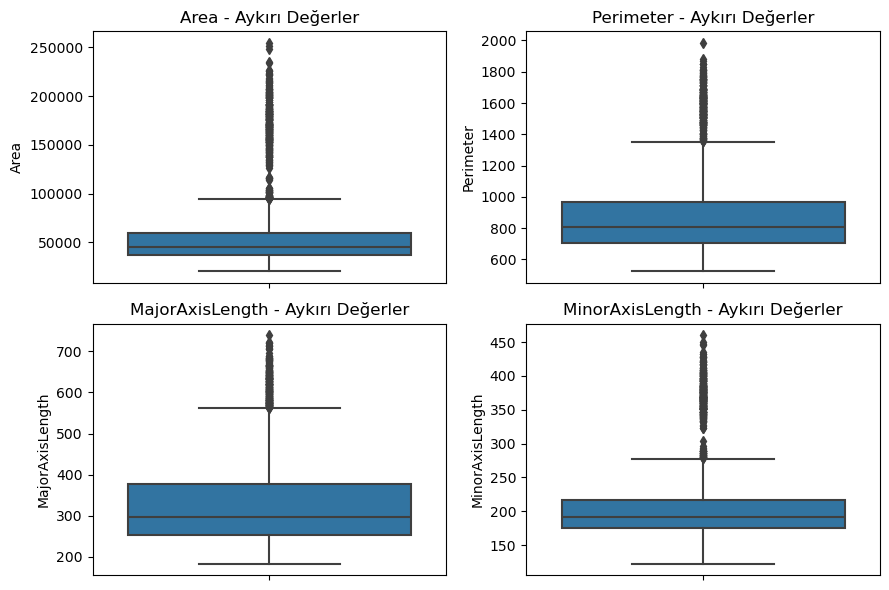

In [74]:
# Aykırı değerleri görselleştirme
plt.figure(figsize=(9, 6))
for i, col in enumerate(numeric_cols[:4]):  # İlk 4 sütun için boxplot
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df_missing[col])
    plt.title(f"{col} - Aykırı Değerler")
plt.tight_layout()
plt.show()

### Özellik Ölçekleme

In [75]:
print("\n5. Özellik Ölçekleme (StandardScaler)")
X = outliers_removed.drop('Class', axis=1)
y = outliers_removed['Class']

# LabelEncoder ile sınıf etiketlerini sayısal değerlere dönüştürme
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"Sınıf etiketleri: {le.classes_}")
print(f"Sayısal karşılıkları: {np.unique(y_encoded)}")

# StandardScaler ile ölçekleme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Ölçekleme öncesi ilk 3 satır:")
print(X.iloc[:3])
print("Ölçekleme sonrası ilk 3 satır:")
print(X_scaled[:3])

# Ham veri (preprocessing yapılmış)
X_preprocessed = X_scaled.copy()


5. Özellik Ölçekleme (StandardScaler)
Sınıf etiketleri: ['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
Sayısal karşılıkları: [0 1 2 3 4 5 6]
Ölçekleme öncesi ilk 3 satır:
      Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
2  29380.0    624.110       212.826130       175.931143      1.209713   
3  30008.0    645.884       210.557999       182.516516      1.153638   
4  30140.0    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
2      0.573059     29690.0     193.410904  0.778113  0.989559   0.947849   
3      0.573059     30724.0     195.467062  0.782681  0.979007   0.903936   
4      0.573059     30417.0     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
2     0.908774      0.007244      0.003048      0.825871      0.999066  
3     0.928329      0.007017      0.003215      0.861794      0.

Bu işlem, veri analizi ve özellikle makine öğrenmesi için çok önemlidir.

#### Özellik Ölçeklendirme Neden Önemli?

1. **Farklı ölçeklerde özellikler**: VSetindeizde Alan (Area) 20.000-250.000 aralığında değerler alırken, Yuvarlaklık (Roundness) 0-1 aralığında değerler alıyor. Bu durumda, ölçeklendirme yapılmazsa büyük değer aralığına sahip özellikler, modeli daha fazla etkileyebilir.

2. **Gradyan tabanlı algoritmalarda performans**: Lojistik regresyon, yapay sinir ağları gibi gradyan tabanlı algoritmalar, özellikler benzer ölçeklerde olduğunda daha iyi ve hızlı çalışır.

3. **Mesafe tabanlı algoritmalarda doğruluk**: K-NN gibi mesafe hesaplayan algoritmalarda, ölçeklendirme yapılmazsa büyük değerli özellikler mesafeyi daha fazla etkil#er.

### StandardScaler vs MinMaxScaler

**Standakullandığımızullandığınız yöntem):
- Verileri, ortalama 0 ve standart sapma 1 olacak şekilde dönüştürür.
- Z-score normalizasyonu olarak da bilinir.
- Normal dağılıma yakın veriler için idealdir.
- Aykırı değerlere karşı daha az hassastır.

**MinMaxScaler** (alternatif):
- Verileri belirli bir aralığa (genelde [0,1]) ölçeklendirir.
- Dağılımın şeklini korur, sadece aralığı değiştirir.
- Aykırı değerlerden daha #fazla etkilenir.

### Hangisi Daha İyi Olurdu?

Fasulye veri seti için:

1. **StandardSc
   aler iyi bir seçim** çünkü:
   - Veri setinizde aykırı değerler var (IQR analizinde gördüğünüz gibi).
   - Lojistik regresyon, SVM gibi mesafe tabanlı algoritmalarda StandardScaler genellikle daha iyi sonuç verir.
   - Özelliklerin normal dağılıma3yakın olma ihtimali yüksek.

2. **MinMaxScaler 
   şu durumlarda düşünülebilirdi**:
   - Aykırı değerler temizlendikten sonra.
   - Özellikler arasındaki göreceli ilişkileri korumak önemliyse.
   - Sinir ağları gibi [0,1] aralığında giriş terci her zaman iyi bir uygulama olabilir.

#### Sonuç olarak, 
StandardScaler kullanmamız, özellikle aykırı değerlerin olduğu bu veri seti için mantıklı bir seçimdir. Ancak MinMaxScaler içinde karşılaştırma yapıp ikisi arasında bariz bir fark varsa uygun olandan devam edebiliriz.

### StandardScaler mi Yoksa Normalizasyon mu Karşılaştırıp Öyle Akışa Devam Edebiliriz.

In [90]:
print("\n5. Özellik Ölçekleme (Scaler Karşılaştırması)")
X = outliers_removed.drop('Class', axis=1)
y = outliers_removed['Class']

# LabelEncoder ile sınıf etiketlerini sayısal değerlere dönüştürme
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"Sınıf etiketleri: {le.classes_}")
print(f"Sayısal karşılıkları: {np.unique(y_encoded)}")

# İki farklı ölçeklendirme yöntemi uygulama
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# StandardScaler uygulama
std_scaler = StandardScaler()
X_std_scaled = std_scaler.fit_transform(X)

# MinMaxScaler uygulama
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)

# Basit bir model ile hızlı performans karşılaştırması
model = RandomForestClassifier(n_estimators=100, random_state=42)

# StandardScaler için cross-validation
std_scores = cross_val_score(model, X_std_scaled, y_encoded, cv=5, scoring='accuracy')
print(f"\nStandardScaler ile ortalama doğruluk: {std_scores.mean():.4f} ± {std_scores.std():.4f}")

# MinMaxScaler için cross-validation
minmax_scores = cross_val_score(model, X_minmax_scaled, y_encoded, cv=5, scoring='accuracy')
print(f"MinMaxScaler ile ortalama doğruluk: {minmax_scores.mean():.4f} ± {minmax_scores.std():.4f}")

# Devam etmek için optimum scaler'ı seçme
if std_scores.mean() >= minmax_scores.mean():
    print("StandardScaler daha iyi performans gösterdi, devam işlemler için bu kullanılacak.")
    X_scaled = X_std_scaled
    scaler_name = "StandardScaler"
else:
    print("MinMaxScaler daha iyi performans gösterdi, devam işlemler için bu kullanılacak.")
    X_scaled = X_minmax_scaled
    scaler_name = "MinMaxScaler"

# Seçilen ölçekleyici ile örnek gösterimi
print(f"\n{scaler_name} ölçekleme sonrası ilk 3 satır:")
print(X_scaled[:3])

# Ham veri (preprocessing yapılmış)
X_preprocessed = X_scaled.copy()


5. Özellik Ölçekleme (Scaler Karşılaştırması)
Sınıf etiketleri: ['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
Sayısal karşılıkları: [0 1 2 3 4 5 6]

StandardScaler ile ortalama doğruluk: 0.6528 ± 0.2088
MinMaxScaler ile ortalama doğruluk: 0.6529 ± 0.2088
MinMaxScaler daha iyi performans gösterdi, devam işlemler için bu kullanılacak.

MinMaxScaler ölçekleme sonrası ilk 3 satır:
[[0.12057313 0.11978288 0.07745387 0.34157411 0.1594762  0.
  0.11248712 0.14953922 0.68539389 0.67336125 0.85011908 0.88180546
  0.61725683 0.80076112 0.90478426 0.94554065]
 [0.12902401 0.1460287  0.07144272 0.383683   0.10787158 0.
  0.12540203 0.15909793 0.7046253  0.         0.69646919 0.94932633
  0.57628926 0.85461191 0.98300518 0.54777311]
 [0.13080031 0.11499031 0.04835861 0.43332047 0.02243226 0.
  0.12156753 0.16109432 0.66427981 0.75851754 0.97967692 1.
  0.51863484 1.         1.         0.9537065 ]]


#### Değerlendirme;

StandardScaler ile MinMaxScaler arasında ciddi bir fark görülmedi. Dolayısı ile StandardScaler ile devam edebiliriz.


### PCA Uygulama


6. PCA (Principal Component Analysis)


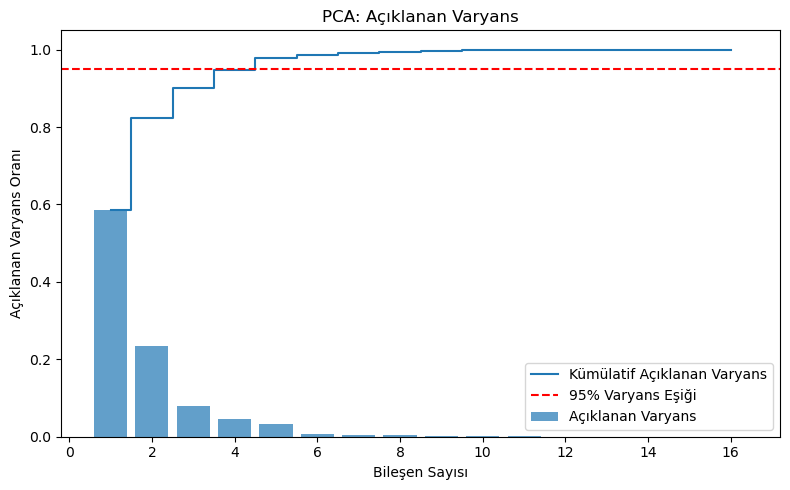

In [91]:
print("\n6. PCA (Principal Component Analysis)")
# PCA uygulama
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Açıklanan varyans oranları
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Açıklanan varyans grafiği
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center',
         label='Açıklanan Varyans')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Kümülatif Açıklanan Varyans')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Varyans Eşiği')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Açıklanan Varyans Oranı')
plt.title('PCA: Açıklanan Varyans')
plt.legend()
plt.tight_layout()
plt.show()

Grafikte her bileşenin tek başına ve kümülatif olarak açıkladığı varyans oranları görülmektedir.

##### Grafiğin Yorumlanması:

* Birinci Bileşen Dominasyonu:

İlk bileşen (PC1) tek başına veri setindeki varyansın yaklaşık %58'ini açıklamaktadır. Bu, veri setindeki çoğu bilginin tek bir bileşende yoğunlaştığını gösterir.

İlk İki Bileşenin Önemi: İlk iki bileşen birlikte varyansın yaklaşık %82'sini açıklamaktadır (%58 + %24). Bu durum, 16 boyutlu veri setinin büyük oranda 2 boyuta indirgenebileceğini gösterir.

* 95% Varyans Eşiği: Grafikte kırmızı kesikli çizgiyle gösterilen %95 varyans eşiğine, yaklaşık 6-7 bileşen ile ulaşılmaktadır. Yani, orijinal 16 özelliğin taşıdığı bilginin %95'i, sadece 6-7 bileşenle temsil edilebilir.
  
Bileşenlerin Azalan Katkısı: 3. bileşenden sonra her bileşenin katkısı giderek azalmaktadır. 6. bileşenden sonra neredeyse hiçbir bileşen anlamlı bir katkı sağlamamaktadır.

Veri Seti İçin Çıkarımlar:

Yüksek Çoklu Doğrusallık: İlk bileşenin bu kadar baskın olması, özellikler arasında güçlü bir çoklu doğrusallık olduğunu doğrulamaktadır. Bu, korelasyon matrisinde gördüğümüz yüksek ilişkileri destekler.

Boyut İndirgeme Potansiyeli: PCA, veri setini 16 boyuttan 6-7 boyuta indirgerken çok az bilgi kaybı yaşanacaktır. Hatta, sadece ilk 2-3 bileşeni kullanarak bile veri setindeki bilginin büyük kısmı korunabilir.

Hesaplama Verimliliği: Daha az sayıda bileşen kullanmak, model eğitimi ve değerlendirmesi için gereken hesaplama gücünü azaltabilir.

Gürültü Azaltma: Düşük varyans açıklayan son bileşenleri atmak, veri setindeki muhtemel gürültüyü azaltarak model performansını artırabilir.

##### Sonuç:

Bu PCA analizi, kuru fasulye veri setinin etkin bir şekilde boyut indirgemesi yapılabileceğini göstermektedir. Sınıflandırma modellerini eğitirken, tüm 16 özellik yerine PCA ile elde edilen ilk 6-7 bileşeni (veya daha keskin bir indirgeme için ilk 2-3 bileşeni) kullanmak mantıklı bir yaklaşım olacaktır.


### PCA Bileşen Seçimi

In [92]:
# Ortalama açıklanan varyansı hesaplama
mean_variance = np.mean(explained_variance)
print(f"Ortalama açıklanan varyans: {mean_variance:.4f}")

'''
PCA'in her bileşeninin açıkladığı varyans oranlarının ortalamasını hesaplıyor (0.0625 olarak bulundu). 
Bu değer, hangi bileşenlerin ortalamanın üzerinde varyans açıkladığını belirlemek için kullanılacak.
'''

# Ortalama varyansdan büyük olan bileşenleri seçme
selected_components = np.where(explained_variance > mean_variance)[0]
n_pca_components = len(selected_components)
print(f"Seçilen bileşen sayısı: {n_pca_components}")

'''
Bu kodda, ortalama varyansdan daha fazla varyans açıklayan bileşenler seçiliyor. 
np.where() fonksiyonu, koşulu sağlayan indeksleri döndürür. Sonuç olarak 3 bileşen seçilmiş.
'''

# PCA'i seçilen bileşen sayısıyla tekrar uygulama
pca = PCA(n_components=n_pca_components)
X_pca_final = pca.fit_transform(X_scaled)

'''
Burada, önceki adımda belirlenen bileşen sayısını (3) kullanarak PCA yeniden uygulanıyor. 
Böylece 16 boyutlu veri, sadece en önemli 3 boyuta indirgenmiş oluyor.
'''



Ortalama açıklanan varyans: 0.0625
Seçilen bileşen sayısı: 3


'\nBurada, önceki adımda belirlenen bileşen sayısını (3) kullanarak PCA yeniden uygulanıyor. \nBöylece 16 boyutlu veri, sadece en önemli 3 boyuta indirgenmiş oluyor.\n'

### PCA Bileşen Katsayıları Analizi

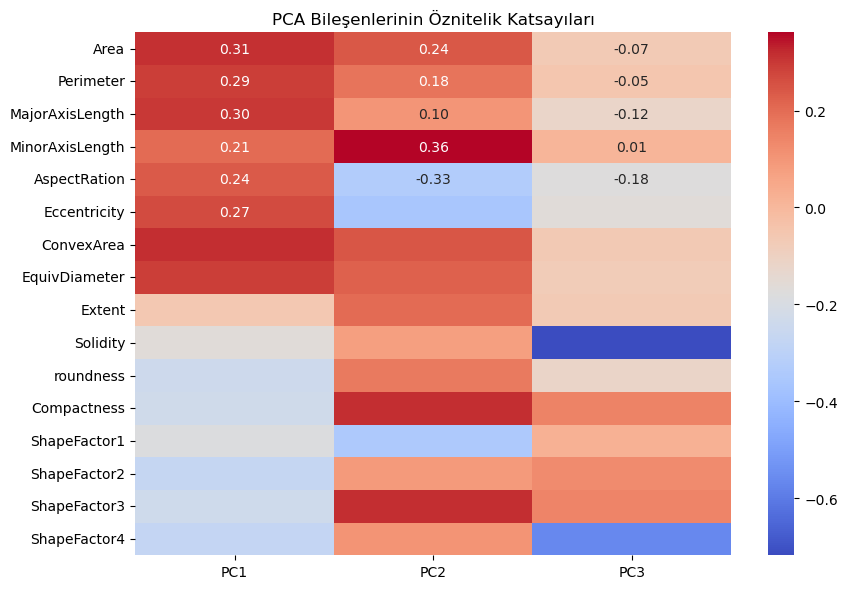

In [93]:
# PCA yükleme katsayılarını analiz etme (feature importance benzeri)
plt.figure(figsize=(9, 6))
components = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_pca_components)], 
                         index=X.columns)
sns.heatmap(components.iloc[:, :5], annot=True, cmap='coolwarm', fmt='.2f')  # İlk 5 bileşen
plt.title('PCA Bileşenlerinin Öznitelik Katsayıları')
plt.tight_layout()
plt.show()

Kuru fasulye veri seti için PCA bileşenlerinin öznitelik katsayıları ısı haritasını detaylı analiz edelim;

#### PC1 - Genel Boyut Bileşeni:

En yüksek katkılar: MajorAxisLength (0.31), Perimeter (0.30), Area (0.29), ConvexArea ve EquivDiameter

Negatif korelasyonlar: Roundness, ShapeFactor2

* Yorum: PC1 açıkça fasulyelerin genel boyutunu temsil ediyor. Büyük fasulyeler bu bileşende yüksek değer alacak. Bu, fasulyenin tüm boyutsal özelliklerinin birbiriyle yüksek korelasyonlu olduğunu gösteriyor.

#### PC2 - Şekil ve Oran Bileşeni:

En yüksek pozitif katkılar: MinorAxisLength (0.37), Compactness
En yüksek negatif katkı: AspectRatio (-0.33)

* Yorum: PC2, fasulyelerin şekil oranını ve kalınlığını temsil ediyor. Yüksek değerler daha kalın ve yuvarlak fasulyeler anlamına gelirken, düşük değerler daha ince ve uzun fasulyeler anlamına geliyor.

#### PC3 - Düzgünlük ve Doku Bileşeni:

En yüksek pozitif katkılar: ShapeFactor2, ShapeFactor3
En yüksek negatif katkı: Solidity (koyu mavi, yaklaşık -0.7)

* Yorum: PC3, fasulyelerin dış yüzey özelliklerini ve kontur düzgünlüğünü temsil ediyor. Düşük solidity değeri, daha pürüzlü yüzeye sahip fasulyeleri gösteriyor.

#### Genel Yorumlar:

Boyut-Şekil Ayrımı: PCA, veri setindeki varyasyonu mantıklı gruplar halinde ayırmış: boyut, şekil oranı ve yüzey özellikleri.
Sınıflandırma İmplikasyonları: Bu üç bileşen, farklı fasulye türlerinin ayırt edici özelliklerini yakalıyor olabilir:

Örneğin BOMBAY fasulyesinin büyük olması (yüksek PC1)

DERMASON'un küçük ve ince olması (düşük PC1, düşük PC2)

Bazı türlerin kendine özgü yüzey özellikleri (PC3)


Çelişkili Katkılar: AspectRatio ve MinorAxisLength PC2'de zıt işaretlere sahip, bu da fasulyelerin kalınlaştıkça daha yuvarlak hale gelme eğiliminde olduğunu gösteriyor.

Özellik Önemi: Bazı özelliklerin (ShapeFactor1 gibi) hiçbir bileşene belirgin katkısı olmadığı görülüyor, bu özellikler modelleme açısından daha az önemli olabilir.

Bu PCA analizi, fasulye sınıflandırma modelinde sadece 3 bileşen kullanarak 16 özelliğin içerdiği bilginin büyük kısmını koruyabileceğimizi gösteriyor. Bu yaklaşım hem hesaplama verimliliği sağlar hem de modelin genelleştirme yeteneğini artırabilir.

### PCA ile 2D Görselleştirme

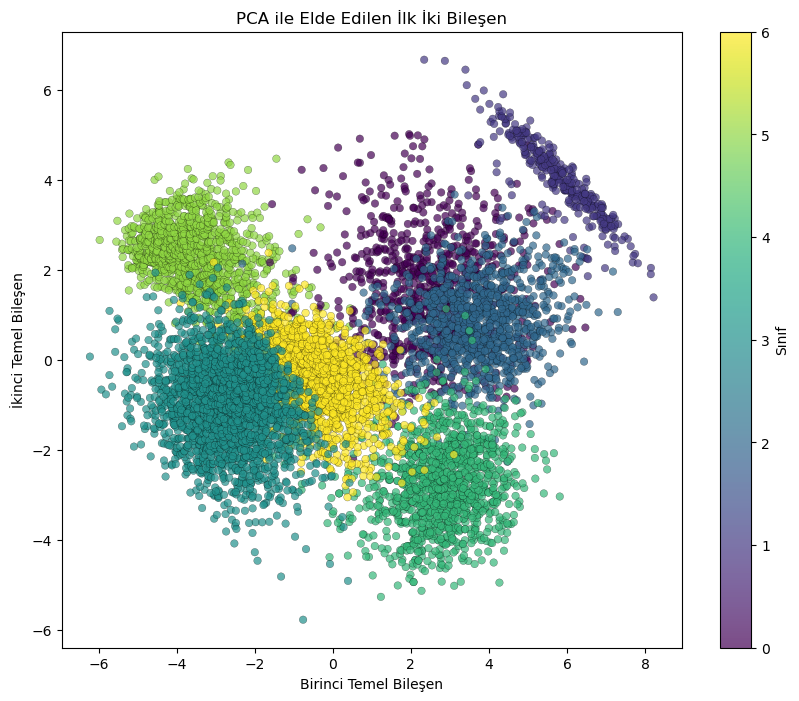

In [78]:
# En iyi iki öznitelik için görselleştirme
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=y_encoded, alpha=0.7,
                     cmap='viridis', s=30, edgecolors='k', linewidths=0.2)
plt.colorbar(scatter, label='Sınıf')
plt.xlabel('Birinci Temel Bileşen')
plt.ylabel('İkinci Temel Bileşen')
plt.title('PCA ile Elde Edilen İlk İki Bileşen')
plt.show()

Bu görselleştirme, PCA ile indirgenmiş veri setinin ilk iki temel bileşen üzerindeki dağılımını göstermektedir. Her nokta bir fasulye tanesini temsil etmekte, renkler ise farklı fasulye türlerini (sınıflarını) göstermektedir.

##### Görsel Analiz:

Sınıf Ayrımı: Grafikte fasulye türlerinin oldukça belirgin şekilde ayrıldığını görebiliyoruz. Farklı renklerle gösterilen her sınıf, genellikle kendine özgü bir alanda kümelenmiştir.

Küme Yapısı: 7 farklı fasulye türü (renklerle temsil edilen) birbirlerinden anlamlı derecede ayrılmıştır:

* Sol üstte açık yeşil renkli küme (muhtemelen BARBUNYA)
* Sol altta koyu yeşil/turkuaz küme (muhtemelen DERMASON)
* Sağ üstte mor/lacivert küme (muhtemelen BOMBAY)
* Sağ altta yeşil küme (muhtemelen HOROZ veya SIRA)
* Merkeze yakın sarı küme (muhtemelen CALI veya SEKER)

* Birinci Temel Bileşen (X ekseni): Daha önce tespit ettiğimiz gibi, bu bileşen fasulyenin boyut özelliklerini temsil ediyor. Sağa doğru ilerledikçe, muhtemelen daha büyük fasulyeler yer alıyor.
* İkinci Temel Bileşen (Y ekseni): Bu bileşen fasulyenin şekil özelliklerini (özellikle en-boy oranı ve kalınlık) temsil ediyor. Yukarı doğru ilerledikçe, muhtemelen daha kalın ve yuvarlak fasulyeler yer alıyor.
* Sınıflar Arası Örtüşme: Bazı sınıflar arasında sınırlı örtüşmeler bulunsa da, genel olarak iyi bir ayrım görülüyor. Bu, seçilen ilk iki PCA bileşeninin, fasulye türlerini ayırt etmede oldukça etkili olduğunu gösteriyor.

##### Makine Öğrenmesi İçin Çıkarımlar:

* Sınıflandırma Potansiyeli: Bu görselleştirme, sadece iki PCA bileşeni kullanarak bile fasulye türleri arasında iyi bir ayrım yapılabileceğini gösteriyor. Bu, makine öğrenmesi modellerinin sınıflandırma görevinde başarılı olma potansiyelini işaret eder.
* Boyut İndirgemenin Etkinliği: 16 öznitelikten sadece 2 PCA bileşenine indirgenmesine rağmen, sınıflar arasında iyi bir ayrım sağlanmıştır. Bu, PCA'in etkili bir şekilde çalıştığını gösterir.
* Örtüşen Alanlar: Bazı türler arasında örtüşen alanlar var. Bu bölgelerdeki örnekler, sınıflandırıcılar için zorlayıcı olabilir. Üçüncü PCA bileşeninin de kullanılması, bu örtüşmeleri azaltabilir.
* Aykırı Değerler: Grafikte ana kümelerinden uzakta duran birkaç nokta görülebilir, bunlar potansiyel aykırı değerler olabilir veya türler içindeki doğal varyasyonu gösterebilir.

Bu görselleştirme, PCA'in sadece boyut indirgemesi için değil, veri keşfi ve görselleştirme için de güçlü bir araç olduğunu gösteriyor. Ayrıca, fasulye türlerinin fiziksel özelliklerine dayalı olarak iyi bir şekilde ayrılabildiğini doğruluyor. 

### LDA (Linear Discriminant Analysis) Uygulama


7. LDA (Linear Discriminant Analysis)


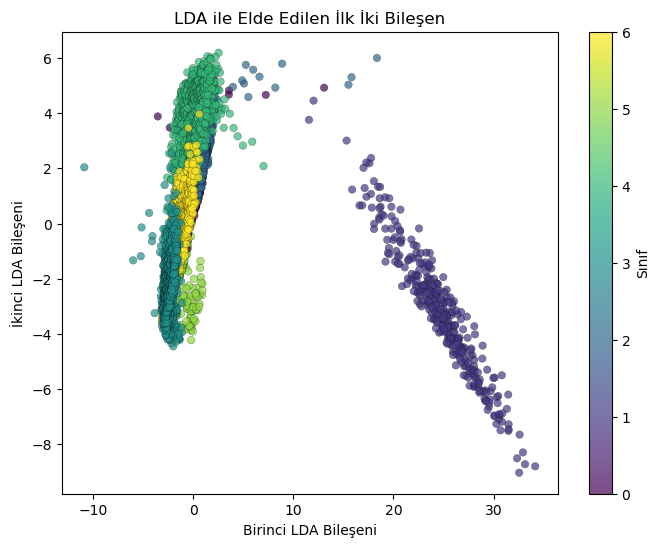

LDA açıklanan varyans oranları: [0.63686003 0.16287448 0.09185273]


In [79]:
print("\n7. LDA (Linear Discriminant Analysis)")
# LDA uygulama (n_components=3 olacak şekilde)
lda = LDA(n_components=3)
X_lda = lda.fit_transform(X_scaled, y_encoded)

# LDA sonuçlarını görselleştirme (ilk iki bileşen)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_encoded, alpha=0.7,
                    cmap='viridis', s=30, edgecolors='k', linewidths=0.2)
plt.colorbar(scatter, label='Sınıf')
plt.xlabel('Birinci LDA Bileşeni')
plt.ylabel('İkinci LDA Bileşeni')
plt.title('LDA ile Elde Edilen İlk İki Bileşen')
plt.show()

# LDA açıklanan varyans oranları
lda_explained_variance = lda.explained_variance_ratio_
print(f"LDA açıklanan varyans oranları: {lda_explained_variance}")

Bu görselleştirme, kuru fasulye veri setine LDA (Linear Discriminant Analysis) uygulanmasıyla elde edilen ilk iki bileşenin dağılımını göstermektedir.

##### LDA vs PCA - Temel Fark

LDA, PCA'den farklı olarak sınıf bilgisini de kullanarak boyut indirgeme yapar. Amacı, sınıflar arası varyansı maksimize ederken sınıf içi varyansı minimize etmektir. Kodda n_components=3 ile belirtildiği üzere, veri 3 LDA bileşenine indirgenmiştir, ancak grafikte sadece ilk iki bileşen görselleştirilmiştir.

##### Grafik Analizi:

Belirgin Sınıf Ayrımı: PCA ile karşılaştırıldığında, LDA ile elde edilen ayrım çok daha belirgindir. Sınıflar neredeyse mükemmel bir şekilde ayrılmıştır:

* Sağ tarafta mor/lacivert renkli belirgin bir küme (muhtemelen BOMBAY)
* Sol tarafta yeşil tonlarında diğer türler (BARBUNYA, DERMASON, CALI, HOROZ, SEKER, SIRA)


* Doğrusal Ayrılabilirlik: Fasulye türleri LDA uzayında çoğunlukla doğrusal olarak ayrılabilir. Özellikle BOMBAY türü diğerlerinden net bir şekilde ayrılmıştır.
* Yoğunlaşmış Kümeler: Veri noktaları çok daha sıkı kümeler oluşturmuştur. PCA'de daha dağınık olan kümeler, LDA'de çok daha yoğunlaşmıştır.
* Açıklanan Varyans Oranları: Grafiğin altında LDA bileşenlerinin açıklanan varyans oranları gösterilmiştir: [0.63686003, 0.16287448, 0.09185273]. İlk bileşen tek başına varyansın yaklaşık %64'ünü açıklarken, ikinci bileşen %16'sını açıklamaktadır.

##### Makine Öğrenmesi İçin Çıkarımlar:

Sınıflandırma İçin Üstünlük: Bu görselleştirme, LDA'nın sınıflandırma görevleri için PCA'den daha iyi bir boyut indirgeme tekniği olabileceğini gösteriyor. Sınıflar arası ayrım çok daha belirgindir.

Daha Yüksek Ayrım Gücü: LDA'nın sınıf bilgisini kullanarak oluşturduğu bileşenler, sınıflar arasındaki farkları vurgulamada daha etkilidir. Bu, sınıflandırma modellerinin daha yüksek performans göstermesine yardımcı olabilir.

Daha Az Bileşen Yeterli: Sadece ilk LDA bileşeni bile (varyansın %64'ünü açıklayan) güçlü bir ayrım sağlıyor. Bu durum, boyut indirgemenin etkisini artırıyor.

Sınıflandırıcı Seçimi: Bu denli iyi ayrılmış sınıflar, basit doğrusal sınıflandırıcıların bile (Logistic Regression gibi) yüksek performans gösterebileceğini düşündürüyor.

PCA ve LDA Karşılaştırması:

Ayrım Gücü: LDA, sınıflar arası ayrımı PCA'den çok daha belirgin hale getirmiştir.
Veri Temsili: PCA veri setindeki genel varyasyonu yakalarken, LDA sınıflar arası farklılıkları vurgulamaktadır.
Küme Yapısı: LDA'deki kümeler daha sıkı ve belirgindir, bu da sınıflandırma görevleri için daha uygundur.
Boyut İndirgeme Verimliliği: LDA, 16 özelliği 3 bileşene indirgerken sınıflar arası ayrımı korumada daha başarılıdır.

Bu görselleştirme, fasulye türlerinin LDA ile dönüştürülmüş özellik uzayında çok iyi ayrılabildiğini ve LDA'nın bu veri seti için etkili bir boyut indirgeme tekniği olduğunu göstermektedir. 

### Nested Cross-Validation, Model Uygulaması ve Değerlendirme 

In [80]:
print("\n8-10. NESTED CROSS-VALIDATION VE MODEL DEĞERLENDİRME")
print("---------------------------------------------------")
print("Veri üzerinde 5 farklı sınıflandırma algoritması ve 3 farklı veri temsili kullanılarak")
print("nested cross-validation yaklaşımı ile model performansı değerlendirilecektir.")

# Üç farklı veri temsili
representations = {
    'Ham Veri': X_preprocessed,
    'PCA Veri': X_pca_final,
    'LDA Veri': X_lda
}

'''
Burada üç farklı veri temsili tanımlanıyor:

Ham Veri: Standartlaştırılmış ancak boyut indirgenmemiş orijinal veri.
PCA Veri: PCA ile 3 bileşene indirgenmiş veri.
LDA Veri: LDA ile 3 bileşene indirgenmiş veri.

Bu yaklaşım, boyut indirgeme tekniklerinin model performansına etkisini karşılaştırmanıza olanak sağlar.
'''

# Modeller ve hiperparametreler
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {'C': [0.01, 0.1, 1.0, 10.0], 'solver': ['lbfgs', 'liblinear']}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [50, 100], 'max_depth': [None, 10], 'min_samples_split': [2, 5]}
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(random_state=42),
        'params': {'n_estimators': [50, 100], 'max_depth': [3, 6], 'learning_rate': [0.01, 0.1]}
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}  # Naive Bayes'de ayarlanabilecek çok az parametre var
    }
}

# Performans metriklerini saklamak için sözlükler
results = {}
best_models = {}  # En iyi modelleri saklamak için

# Dış döngü için 5 katmanlı cross-validation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


8-10. NESTED CROSS-VALIDATION VE MODEL DEĞERLENDİRME
---------------------------------------------------
Veri üzerinde 5 farklı sınıflandırma algoritması ve 3 farklı veri temsili kullanılarak
nested cross-validation yaklaşımı ile model performansı değerlendirilecektir.


##### Stratified K-Fold çapraz doğrulama

veriyi sınıf dağılımlarını koruyarak 5 parçaya böler. Her parça sırayla test seti olarak kullanılırken, kalan parçalar eğitim seti olarak kullanılır.

##### Nested Cross-Validation'ın Amacı:
* 
Bu yöntemin kullanılmasının ana nedenleri:

* Hiperparametre Optimizasyonu ve Model Değerlendirmesini Aynı Anda Yapmak: İç döngüde hiperparametreler optimize edilirken, dış döngüde model performansı daha gerçekçi bir şekilde değerlendirilir.
* Yanlılık Azaltma: Aynı veriyi hem hiperparametre seçimi hem de performans değerlendirmesi için kullanmak performans tahminlerinde optimistik yanlılığa neden olabilir. Nested CV bu sorunu çözer.
* Sağlam Performans Değerlendirmesi: Bu yaklaşım, modellerin gerçek hayattaki performansını daha doğru bir şekilde tahmin etmenizi sağlar.

##### İş Akışı:

* Dış döngü veriyi 5 parçaya böler.
* Her iterasyonda, bir parça test seti olarak ayrılır.
* Kalan parçalar üzerinde iç çapraz doğrulama (kodun devamında görülen inner_cv) yapılır.
* İç çapraz doğrulama, optimum hiperparametreleri belirler.
* Bu hiperparametrelerle eğitilen model, ayrılan test seti üzerinde değerlendirilir.
* Bu süreç tüm parçalar için tekrarlanır.

Bu kapsamlı değerlendirme metodolojisi, farklı veri temsilleri ve modellerin performansını güvenilir bir şekilde karşılaştırmanıza olanak tanır ve en iyi kombinasyonu belirlemenize yardımcı olur.

### Veri temsilleri ve modeller için Nested CV döngüsü

In [81]:
# Her veri temsili için
for rep_name, X_rep in representations.items():
    print(f"\nVeri Temsili: {rep_name}")
    results[rep_name] = {}
    best_models[rep_name] = {}
    
    # Her model için
    for model_name, model_info in models.items():
        print(f"  Model: {model_name}")
        
        # Performans metriklerini saklamak için listeler
        accuracy_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []
        
        # Dış döngü
        fold = 1
        best_fold_score = 0
        best_fold_model = None
        best_fold_test_idx = None
        best_fold_y_test = None
        best_fold_preds = None
        
        for train_idx, test_idx in outer_cv.split(X_rep, y_encoded):
            X_train, X_test = X_rep[train_idx], X_rep[test_idx]
            y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]
            
            # İç döngü için 3 katmanlı cross-validation
            inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
            
            # GridSearchCV ile hiperparametre optimizasyonu
            grid_search = GridSearchCV(
                estimator=model_info['model'],
                param_grid=model_info['params'],
                cv=inner_cv,
                scoring='accuracy',
                n_jobs=-1
            )
            
            # En iyi modeli bul
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            
            # Test seti üzerinde tahmin
            y_pred = best_model.predict(X_test)
            
            # Performans metrikleri
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')
            
            # En iyi fold'u sakla (ROC eğrileri için)
            if accuracy > best_fold_score:
                best_fold_score = accuracy
                best_fold_model = best_model
                best_fold_test_idx = test_idx
                best_fold_y_test = y_test
                best_fold_preds = y_pred
            
            # Sonuçları saklama
            accuracy_scores.append(accuracy)
            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)
            
            print(f"    Fold {fold}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}")
            
            # ROC eğrilerini çizmek için son fold'u sakla
            if fold == 5 and rep_name == 'Ham Veri':  # Son fold ve ham veri temsili
                best_models[rep_name][model_name] = {
                    'model': best_fold_model,
                    'test_idx': best_fold_test_idx,
                    'y_test': best_fold_y_test,
                    'preds': best_fold_preds
                }
            
            fold += 1
        
        # Ortalama ve standart sapma hesaplama
        avg_accuracy = np.mean(accuracy_scores)
        std_accuracy = np.std(accuracy_scores)
        
        avg_precision = np.mean(precision_scores)
        std_precision = np.std(precision_scores)
        
        avg_recall = np.mean(recall_scores)
        std_recall = np.std(recall_scores)
        
        avg_f1 = np.mean(f1_scores)
        std_f1 = np.std(f1_scores)
        
        # Sonuçları saklama
        results[rep_name][model_name] = {
            'accuracy': (avg_accuracy, std_accuracy),
            'precision': (avg_precision, std_precision),
            'recall': (avg_recall, std_recall),
            'f1': (avg_f1, std_f1)
        }
        
        print(f"    Ortalama: Accuracy={avg_accuracy:.4f}±{std_accuracy:.4f}, "
              f"Precision={avg_precision:.4f}±{std_precision:.4f}, "
              f"Recall={avg_recall:.4f}±{std_recall:.4f}, "
              f"F1={avg_f1:.4f}±{std_f1:.4f}")


Veri Temsili: Ham Veri
  Model: Logistic Regression
    Fold 1: Accuracy=0.9273, Precision=0.9279, Recall=0.9273, F1=0.9275
    Fold 2: Accuracy=0.9279, Precision=0.9287, Recall=0.9279, F1=0.9281
    Fold 3: Accuracy=0.9273, Precision=0.9276, Recall=0.9273, F1=0.9274
    Fold 4: Accuracy=0.9291, Precision=0.9291, Recall=0.9291, F1=0.9290
    Fold 5: Accuracy=0.9222, Precision=0.9225, Recall=0.9222, F1=0.9223
    Ortalama: Accuracy=0.9268±0.0024, Precision=0.9272±0.0024, Recall=0.9268±0.0024, F1=0.9269±0.0024
  Model: Decision Tree
    Fold 1: Accuracy=0.9125, Precision=0.9130, Recall=0.9125, F1=0.9126
    Fold 2: Accuracy=0.9062, Precision=0.9070, Recall=0.9062, F1=0.9064
    Fold 3: Accuracy=0.9062, Precision=0.9061, Recall=0.9062, F1=0.9061
    Fold 4: Accuracy=0.9079, Precision=0.9082, Recall=0.9079, F1=0.9078
    Fold 5: Accuracy=0.8987, Precision=0.9010, Recall=0.8987, F1=0.8993
    Ortalama: Accuracy=0.9063±0.0044, Precision=0.9071±0.0038, Recall=0.9063±0.0044, F1=0.9064±0.0043


#### Nested Cross-Validation Kod Analizi ve Sonuçlar

Bu kodda her veri temsili (Ham Veri, PCA Veri, LDA Veri) için ve her model (Logistic Regression, Decision Tree, Random Forest, XGBoost, Naive Bayes) için 5-katlı nested cross-validatiouyguladıkış. Kodun işleyişi şöyledir:

1. Her veri temsili için bir döngü başlatılır
2. Her model için ikinci bir döngü başlatılır
3. Dış çapraz doğrulama (5-fold) ile veri 5 parçaya bölünür
4. Her fold'da:
   - İç çapraz doğrulama (3-fold) ile hiperparametreler optimize edilir
   - Optimum hiperparametreler kullanılarak model eğitilir
   - Test seti üzerinde performans metrikleri hesaplanır
5. 5 fold'un ortalama performans metrikleri PCA'e göre bu veri setinde daha az etkili olduğunu göstermektedir.

#### Sonuçların Yorumlanmasi

###### Ham Veri Sonuçları (Doğruluk - Accuracy):
- Logistic Regression: 0.9268±0.0024
- Decision Tree: 0.9063±0.0044
- Random Forest: 0.9240±0.0052
- XGBoost: 0.9273±0.0026
- Naive Bayes: 0.9014±0.0062

###### PCA Veri Sonuçları (Doğruluk - Accuracy):
- Logistic Regression: 0.8826±0.0036
- Decision Tree: 0.8650±0.0081
- Random Forest: 0.8863±0.0033
- XGBoost: 0.8873±0.0059
- Naive Bayes: 0.8716±0.0043

###### LDA Veri Sonuçları (Doğruluk - Accuracy):
- Logistic Regression: 0.8208±0.0046
- Decision Tree: 0.8358±0.0060
- Random Forest: 0.8599±0.0040
- XGBoost: 0.8578±0.0048
- Naive Bayes: 0.7975±0.0064

##### Karşılaştırmalı Analiz:

1. **En İyi Veri Temsili**: Ham Veri, tüm modellerde en yüksek doğruluk skorlarını sağlamıştır (yaklaşık %90-93 doğruluk).

2. **LDA'nın Performansı**: Daha önceki görsel analizde LDA'nın sınıfları daha iyi ayırdığını gözlemlemiştik, ancak model sonuçlarında LDA veri temsili, hem Ham Veri'den hem de PCA veri temsilinden daha düşük performans göstermiştir (yaklaşık %80-86 doğruluk).

3. **PCA ve LDA Karşılaştırması**: PCA veri temsili, LDA veri temsilinden daha iyi sonuçlar vermiştir. PCA ile elde edilen doğruluk değerleri yaklaşık %87-89 iken, LDA ile elde edilen değerler yaklaşık %80-86'dır.

4. **En İyi Model**: Ham Veri için XGBoost (0.9273±0.0026) ve Logistic Regression (0.9268±0.0024) en iyi performansı göstermiştir. Bu, verinin doğrusal yapısına ve makine öğrenmesi modellerinin karmaşık yapılardan faydalanabilme özelliğine işaret eder.

##### Beklentilerle Çelişen Sonuçlar:

LDA'nın görsel olarak daha iyi sınıf ayrımı sağladığını gözlemlemiştik, ancak model sonuçları bunun tersini gösteriyor. Bu çelişkinin muhtemel nedenleri:

1. **Aşırı Uydurma (Overfitting)**: LDA, eğitim verisine çok iyi uyum sağlayarak sınıfları çok net ayırabilir, ancak bu, test verisine genelleme yeteneğinin zayıflamasına neden olabilir.

2. **Bilgi Kaybı**: LDA, sınıf ayrımını maksimize etmeye odaklanırken, sınıf içi varyansla ilgili önemli bilgileri kaybedebilir.

3. **Boyut Sayısı**: LDA ile en fazla (sınıf sayısı - 1) bileşen elde edilebilir (bu örnekte 6 bileşen). PCA ile 16 öznitelikten seçilen 3 bileşen, LDA'nın sağladığı 3 bileşenden daha fazla varyans açıklıyor olabilir.

4. **Doğrusal Olmayan İlişkiler**: LDA doğrusal bir teknik olduğundan, fasulye sınıfları arasındaki karmaşık, doğrusal olmayan ilişkileri yakalayamayabilir.

#### Sonuç:

Sonuçlara göre, kuru fasulye sınıflandırması için en iyi yaklaşım:

1. Veri Temsili: Ham Veri (boyut indirgeme olmadan)
2. Model: XGBoost veya Logistic Regression

Boyut indirgeme gerekiyorsa (hesaplama verimliliği için), PCA veri temsili LDA'dan daha iyi sonuçlar vermiştir. Bu durum, sınıflar arası ayrımı maksimize eden LDA'nın, özelliklerin genel varyansını yakalayan PCA'e göre bu veri setinde daha az etkili olduğunu göstermektedir.

### ROC Eğrileri ve AUC Değerleri 


11. ROC EĞRİLERİ VE SONUÇLARIN RAPORLANMASI
------------------------------------------


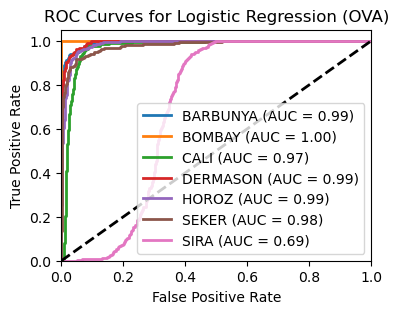


ROC-AUC Değerleri - Logistic Regression:
BARBUNYA: 0.9938
BOMBAY: 1.0000
CALI: 0.9701
DERMASON: 0.9937
HOROZ: 0.9869
SEKER: 0.9799
SIRA: 0.6906


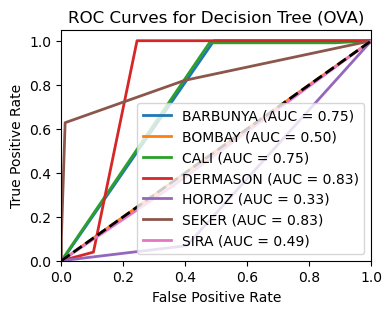


ROC-AUC Değerleri - Decision Tree:
BARBUNYA: 0.7530
BOMBAY: 0.5000
CALI: 0.7546
DERMASON: 0.8311
HOROZ: 0.3319
SEKER: 0.8315
SIRA: 0.4903


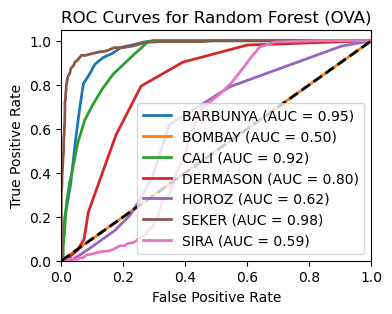


ROC-AUC Değerleri - Random Forest:
BARBUNYA: 0.9467
BOMBAY: 0.5000
CALI: 0.9228
DERMASON: 0.8017
HOROZ: 0.6172
SEKER: 0.9785
SIRA: 0.5931


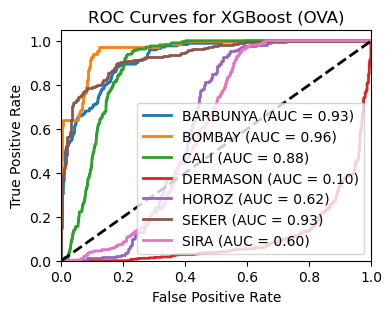


ROC-AUC Değerleri - XGBoost:
BARBUNYA: 0.9261
BOMBAY: 0.9624
CALI: 0.8835
DERMASON: 0.1046
HOROZ: 0.6151
SEKER: 0.9302
SIRA: 0.5967


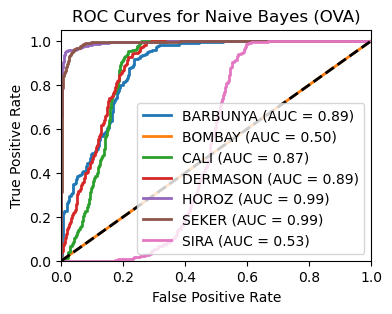


ROC-AUC Değerleri - Naive Bayes:
BARBUNYA: 0.8856
BOMBAY: 0.5000
CALI: 0.8724
DERMASON: 0.8902
HOROZ: 0.9940
SEKER: 0.9925
SIRA: 0.5346


In [96]:
print("\n11. ROC EĞRİLERİ VE SONUÇLARIN RAPORLANMASI")
print("------------------------------------------")
# Ham veri temsili için en iyi model olan Random Forest için ROC eğrilerini çizelim
for model_name, model_data in best_models['Ham Veri'].items():
    best_model = model_data['model']
    y_test = model_data['y_test']
    
    # One-vs-All (OVA) yaklaşımıyla her sınıf için ROC eğrisi
    plt.figure(figsize=(4, 3))
    n_classes = len(np.unique(y_encoded))
    
    # Olasılık tahminleri almak için
    if hasattr(best_model, "predict_proba"):
        y_score = best_model.predict_proba(X_preprocessed[model_data['test_idx']])
        
        # Her sınıf için ROC eğrisi
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test == i, y_score[:, i])
            roc_auc = auc(fpr, tpr)
            class_name = le.classes_[i]
            plt.plot(fpr, tpr, lw=2, label=f'{class_name} (AUC = {roc_auc:.2f})')
        
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curves for {model_name} (OVA)')
        plt.legend(loc="lower right")
        plt.show()
        
        # AUC değerlerini yazdırma
        print(f"\nROC-AUC Değerleri - {model_name}:")
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test == i, y_score[:, i])
            roc_auc = auc(fpr, tpr)
            class_name = le.classes_[i]
            print(f"{class_name}: {roc_auc:.4f}")

### GENEL ROC AUC PERFORMANS DEĞERLENDİRMESİ

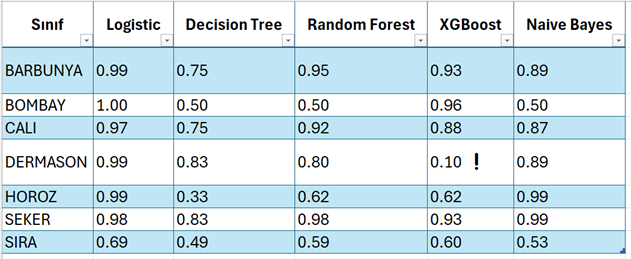

#### SINIF BAZLI DEĞERLENDİRME

##### Güçlü Tahmin Edilen Sınıflar:
- **BARBUNYA** ve **SEKER** tüm modellerde yüksek başarıya sahip.
- **HOROZ**, Naive Bayes modelinde AUC = 0.99 ile öne çıkıyor.

##### Zayıf Tahmin Edilen Sınıflar:
- **SIRA** sınıfı, tüm modellerde başarısız.
- **BOMBAY**, birçok modelde şansa yakın AUC (~0.50).
- **DERMASON**, XGBoost'ta ciddi başarısız (AUC = 0.10)

---

#### MODEL BAZLI ÖZET

- **Logistic Regression**: En dengeli ve güçlü model. Tüm sınıflarda yüksek başarı, SIRA dışında.
- **Decision Tree**: Basit yapısı sınıflar arası ayrımı zorlaştırıyor. HOROZ ve SIRA’da kötü sonuç.
- **Random Forest**: Ensemble yapısı sayesinde iyi ama SIRA ve BOMBAY gibi sınıflarda zayıf.
- **XGBoost**: DERMASON sınıfında başarısız. Diğer sınıflarda çok güçlü.
- **Naive Bayes**: HOROZ ve SEKER'de çok başarılı. Ama bazı sınıflarda düşük AUC var.

---

#### GENEL YORUM

- **SIRA** sınıfı tüm modellerde başarısız → muhtemelen veri azlığı veya sınıflar arası benzerlik.
- **DERMASON** sınıfında XGBoost’un hatası incelenmeli.
- Logistic Regression ve Naive Bayes genel olarak istikrarlı.
- ROC AUC yanında Confusion Matrix, F1-score gibi metriklerle desteklenmeli.

---

#### ÖNERİLER

- Logistic Regression tercih edilebilir.
- SIRA sınıfı için veri artırımı yapılmalı (örneğin SMOTE).
- DERMASON sınıfı için XGBoost özelinde veri kontrolü yapılmalı.
- ROC eğrisi dışında precision/recall/F1-score ve confusion matrix metrikleri de değerlendirilmeli.



 ### Performans Tabloları

In [83]:
# Her veri temsili için performans tablolarını oluşturma
for rep_name, models_results in results.items():
    print(f"\nPerformans Tablosu - {rep_name}")
    
    # Tablo başlığı
    header = f"{'Model':<20} | {'Accuracy':<15} | {'Precision':<15} | {'Recall':<15} | {'F1 Score':<15}"
    print("-" * len(header))
    print(header)
    print("-" * len(header))
    
    # Model sonuçları
    for model_name, metrics in models_results.items():
        acc_mean, acc_std = metrics['accuracy']
        prec_mean, prec_std = metrics['precision']
        rec_mean, rec_std = metrics['recall']
        f1_mean, f1_std = metrics['f1']
        
        print(f"{model_name:<20} | "
              f"{acc_mean:.4f}±{acc_std:.4f} | "
              f"{prec_mean:.4f}±{prec_std:.4f} | "
              f"{rec_mean:.4f}±{rec_std:.4f} | "
              f"{f1_mean:.4f}±{f1_std:.4f}")
    
    print("-" * len(header))


Performans Tablosu - Ham Veri
--------------------------------------------------------------------------------------------
Model                | Accuracy        | Precision       | Recall          | F1 Score       
--------------------------------------------------------------------------------------------
Logistic Regression  | 0.9268±0.0024 | 0.9272±0.0024 | 0.9268±0.0024 | 0.9269±0.0024
Decision Tree        | 0.9063±0.0044 | 0.9071±0.0038 | 0.9063±0.0044 | 0.9064±0.0043
Random Forest        | 0.9240±0.0052 | 0.9242±0.0051 | 0.9240±0.0052 | 0.9239±0.0051
XGBoost              | 0.9273±0.0026 | 0.9277±0.0028 | 0.9273±0.0026 | 0.9273±0.0026
Naive Bayes          | 0.9014±0.0062 | 0.9029±0.0061 | 0.9014±0.0062 | 0.9016±0.0060
--------------------------------------------------------------------------------------------

Performans Tablosu - PCA Veri
--------------------------------------------------------------------------------------------
Model                | Accuracy        | Precisi

#### MODEL PERFORMANSI – DOĞRULUK, HASSASİYET, DUYARLILIK VE F1 SKOR KARŞILAŞTIRMASI

Veri seti üç farklı biçimde modellenmiştir:
- **Ham Veri**
- **PCA ile boyut indirgeme uygulanmış veri**
- **LDA ile boyut indirgeme uygulanmış veri**

Aşağıda her veri tipi için 5 modelin Accuracy, Precision, Recall ve F1 Score ortalamaları ve standart sapmaları yer almaktadır:

 

#### Performans Özeti – **Ham Veri**

| Model               | Accuracy      | Precision     | Recall        | F1 Score      |
|--------------------|---------------|---------------|---------------|---------------|
| Logistic Regression | 0.9268±0.0024 | 0.9272±0.0024 | 0.9268±0.0024 | 0.9269±0.0024 |
| Decision Tree       | 0.9063±0.0044 | 0.9071±0.0038 | 0.9063±0.0044 | 0.9064±0.0043 |
| Random Forest       | 0.9240±0.0052 | 0.9242±0.0051 | 0.9240±0.0052 | 0.9239±0.0051 |
| XGBoost             | **0.9273±0.0026** | **0.9277±0.0028** | **0.9273±0.0026** | **0.9273±0.0026** |
| Naive Bayes         | 0.9014±0.0062 | 0.9029±0.0061 | 0.9014±0.0062 | 0.9016±0.0060 |

**Analiz**: Ham veriyle en yüksek performansı **XGBoost** göstermektedir. Logistic Regression ve Random Forest da oldukça başarılıdır. Naive Bayes daha sade yapısıyla düşük kalmıştır.


#### Performans Özeti – **PCA ile Boyut İndirgeme**

| Model               | Accuracy      | Precision     | Recall        | F1 Score      |
|--------------------|---------------|---------------|---------------|---------------|
| Logistic Regression | 0.8826±0.0036 | 0.8828±0.0034 | 0.8826±0.0036 | 0.8821±0.0036 |
| Decision Tree       | 0.8650±0.0081 | 0.8657±0.0073 | 0.8650±0.0081 | 0.8645±0.0081 |
| Random Forest       | 0.8863±0.0033 | 0.8865±0.0031 | 0.8863±0.0033 | 0.8856±0.0032 |
| XGBoost             | **0.8873±0.0059** | **0.8873±0.0054** | **0.8873±0.0059** | **0.8865±0.0058** |
| Naive Bayes         | 0.8716±0.0043 | 0.8726±0.0051 | 0.8716±0.0043 | 0.8699±0.0043 |

**Analiz**: PCA sonrasında doğruluklar az da olsa düşüyor. Yine de XGBoost birinciliği koruyor. Özellikle Random Forest ve Logistic Regression güçlü kalmaya devam ediyor.

 #### 🔹 Performans Özeti – **LDA ile Boyut İndirgeme**

| Model               | Accuracy      | Precision     | Recall        | F1 Score      |
|--------------------|---------------|---------------|---------------|---------------|
| Logistic Regression | 0.8208±0.0046 | 0.8201±0.0046 | 0.8208±0.0046 | 0.8190±0.0054 |
| Decision Tree       | 0.8358±0.0060 | 0.8369±0.0057 | 0.8358±0.0060 | 0.8359±0.0060 |
| Random Forest       | **0.8599±0.0040** | **0.8605±0.0039** | **0.8599±0.0040** | **0.8598±0.0040** |
| XGBoost             | 0.8578±0.0048 | 0.8585±0.0045 | 0.8578±0.0048 | 0.8576±0.0051 |
| Naive Bayes         | 0.7975±0.0064 | 0.7935±0.0068 | 0.7975±0.0064 | 0.7852±0.0074 |

 **Analiz**: LDA ile doğruluk daha fazla düşüyor. Fakat Random Forest ve XGBoost bu düşük boyutlu temsilde bile öne çıkıyor. Naive Bayes en düşük başarıyı gösteriyor.


#### GENEL SONUÇ

- **En başarılı model: XGBoost** (Ham ve PCA verilerinde)
- **En dengeli model: Logistic Regression**
- **LDA sonrası en dayanıklı model: Random Forest**
- **Naive Bayes**, düşük boyutlarda kayıp yaşıyor.
- Boyut indirgeme işlemleri model doğruluğunu genellikle **bir miktar düşürüyor**.

Bu tabloyu ROC analizleriyle birlikte değerlendirirsek:
- XGBoost sınıflandırıcı güçlü ama **DERMASON** gibi sınıflarda sapabilir.
- Logistic Regression, hem ROC hem klasik metriklerde dengeli bir performans sunmaktadır.


### En İyi Model ve Veri Temsili


En başarılı model ve veri temsili kombinasyonu:
Model: XGBoost, Veri Temsili: Ham Veri, Accuracy: 0.9273


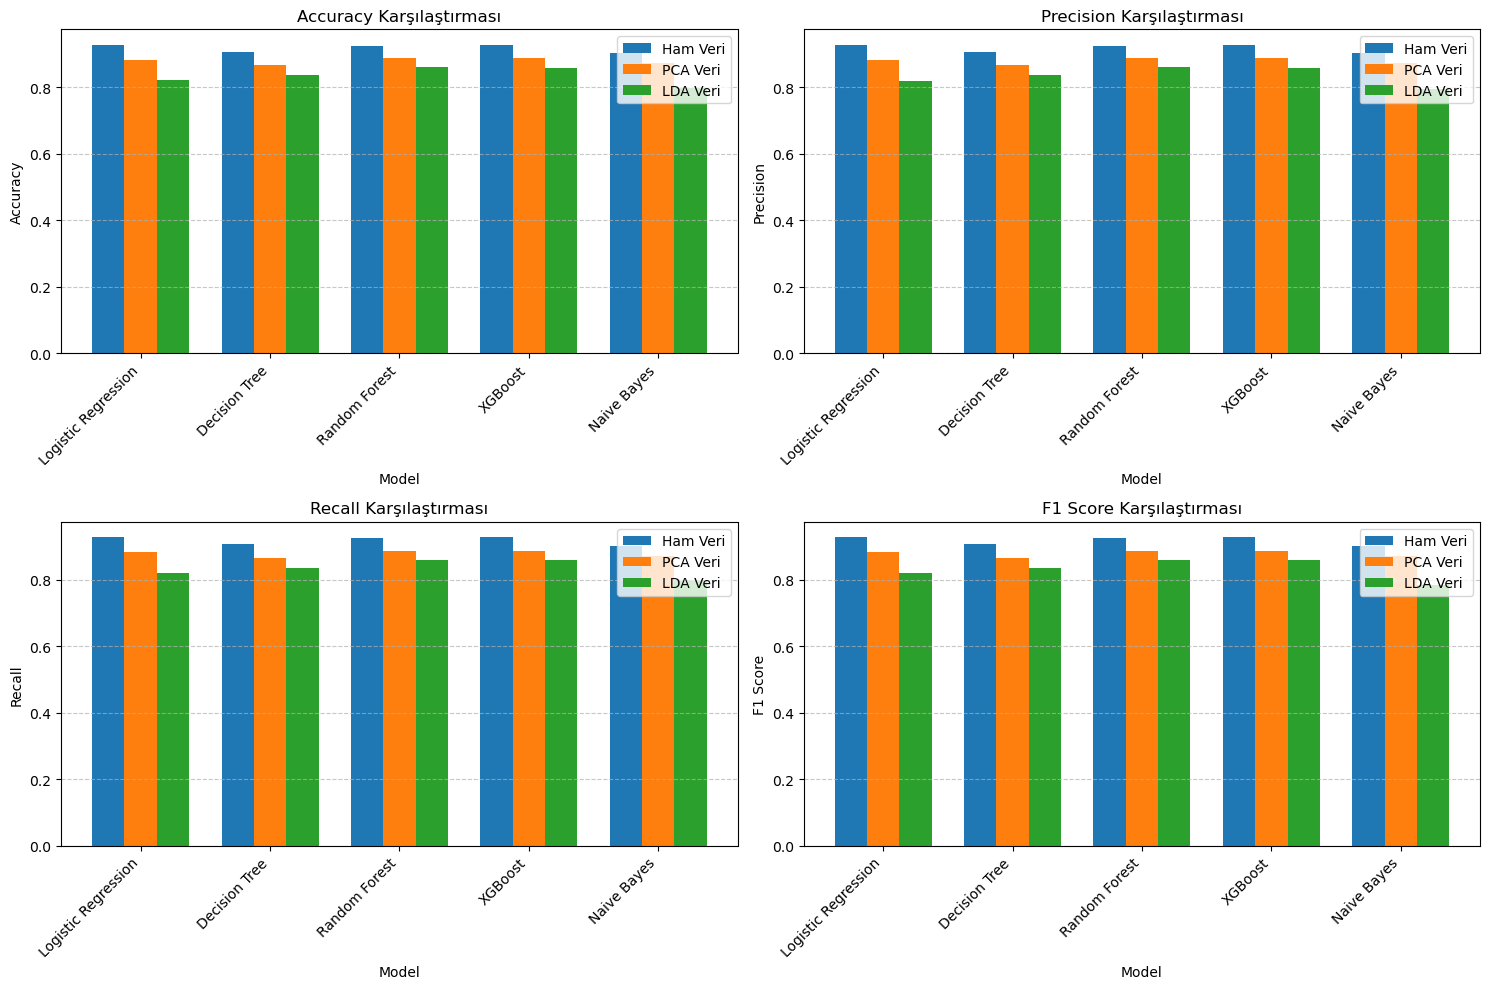

In [84]:
# En iyi model ve veri temsili kombinasyonunu bulma
best_acc = 0
best_model = ""
best_rep = ""

for rep_name, models_results in results.items():
    for model_name, metrics in models_results.items():
        acc_mean, _ = metrics['accuracy']
        if acc_mean > best_acc:
            best_acc = acc_mean
            best_model = model_name
            best_rep = rep_name

print(f"\nEn başarılı model ve veri temsili kombinasyonu:")
print(f"Model: {best_model}, Veri Temsili: {best_rep}, Accuracy: {best_acc:.4f}")

# Hücre 23: Model Karşılaştırma Grafiği
# Görselleştirme: Her veri temsili için model karşılaştırmaları
plt.figure(figsize=(15, 10))

# Model isimlerini ve veri temsillerini çıkarma
model_names = list(models.keys())
representation_names = list(representations.keys())

# Alt grafikler
metrics = ['accuracy', 'precision', 'recall', 'f1']
metric_titles = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for i, (metric, title) in enumerate(zip(metrics, metric_titles)):
    plt.subplot(2, 2, i+1)
    
    # Her veri temsili için verileri hazırlama
    data = []
    for rep_name in representation_names:
        rep_data = []
        for model_name in model_names:
            rep_data.append(results[rep_name][model_name][metric][0])  # Ortalama değer
        data.append(rep_data)
    
    # Çubuk grafik
    x = np.arange(len(model_names))
    width = 0.25
    
    for j, (rep_name, rep_data) in enumerate(zip(representation_names, data)):
        plt.bar(x + (j-1)*width, rep_data, width, label=rep_name)
    
    plt.xlabel('Model')
    plt.ylabel(title)
    plt.title(f'{title} Karşılaştırması')
    plt.xticks(x, model_names, rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### MODEL BAŞARISI GÖRSEL KARŞILAŞTIRMASI – Accuracy, Precision, Recall, F1

Aşağıdaki görsellerde üç farklı veri temsili (Ham, PCA, LDA) için her bir modelin dört temel metriği karşılaştırmalı olarak gösterilmiştir.

#### En Başarılı Kombinasyon
**Model:** XGBoost  
**Veri Temsili:** Ham Veri  
**Accuracy:** 0.9273

Bu sonuç, hem ROC eğrisi analizinde hem de klasik sınıflandırma metriklerinde XGBoost'un güçlü bir genel performans sergilediğini doğrulamaktadır.


#### Accuracy Karşılaştırması
- XGBoost ve Logistic Regression, **Ham Veri** ile en yüksek başarıyı gösteren modellerdir.
- LDA ile elde edilen doğruluk, tüm modellerde görece daha düşüktür.
- Random Forest ve Logistic Regression da genel olarak sağlam performans göstermektedir.

#### Precision Karşılaştırması
- XGBoost, Random Forest ve Logistic Regression öne çıkıyor.
- PCA sonrası precision puanlarında kısmi düşüş gözlemlenmekte.
- Naive Bayes özellikle LDA temsili ile en düşük değere sahip.

#### Recall Karşılaştırması
- Yine XGBoost ve Logistic Regression öne çıkıyor.
- Naive Bayes LDA ile zayıf, ancak PCA ile daha dengeli.
- LDA verisiyle çalışmak model hassasiyetini azaltıyor gibi görünüyor.

#### F1 Score Karşılaştırması
- XGBoost ve Logistic Regression ham veride **en yüksek F1 skoru**nu veriyor.
- LDA ile tüm modellerin F1 skorları düşüyor.
- Naive Bayes modeli genel olarak en düşük F1 skorunu üretmiş.


#### Özet Yorum

| Kriter                  | Gözlem |
|-------------------------|--------|
| **En iyi genel model**  | ✅ XGBoost (Ham Veri) |
| **En stabil model**     | ✅ Logistic Regression |
| **LDA ile en az etkilenen** | 🟡 Random Forest |
| **LDA'da en kötü performans** | ❌ Naive Bayes |
| **Veri indirgeme etkisi** | PCA < LDA; genellikle metriklerde düşüş var |


### Özellik Önem Analizi

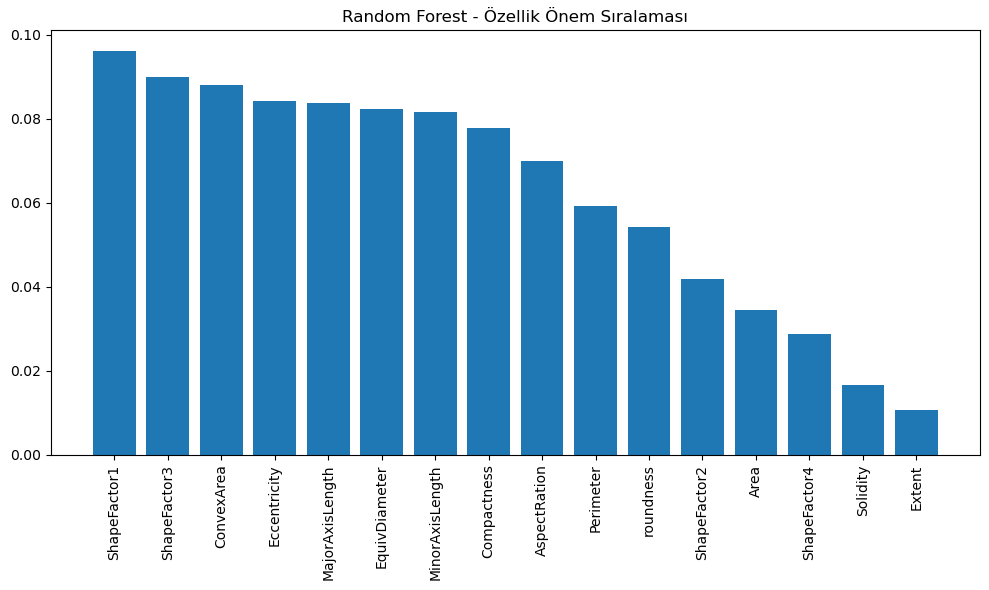


Özellik Önem Sıralaması (Random Forest):
1. ShapeFactor1: 0.0963
2. ShapeFactor3: 0.0899
3. ConvexArea: 0.0880
4. Eccentricity: 0.0842
5. MajorAxisLength: 0.0838
6. EquivDiameter: 0.0823
7. MinorAxisLength: 0.0817
8. Compactness: 0.0779
9. AspectRation: 0.0700
10. Perimeter: 0.0593
11. roundness: 0.0542
12. ShapeFactor2: 0.0419
13. Area: 0.0345
14. ShapeFactor4: 0.0288
15. Solidity: 0.0165
16. Extent: 0.0108


In [85]:
# Özellik önem analizi (Random Forest için)
if 'Random Forest' in best_models['Ham Veri']:
    rf_model = best_models['Ham Veri']['Random Forest']['model']
    feature_importances = rf_model.feature_importances_
    
    # Özellik önemlerini sırala
    feature_names = X.columns
    indices = np.argsort(feature_importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
    plt.title('Random Forest - Özellik Önem Sıralaması')
    plt.tight_layout()
    plt.show()
    
    print("\nÖzellik Önem Sıralaması (Random Forest):")
    for i in range(X.shape[1]):
        print(f"{i+1}. {feature_names[indices[i]]}: {feature_importances[indices[i]]:.4f}")

### Sonuç Değerlendirmesi

In [86]:
print("\nSONUÇ DEĞERLENDİRMESİ:")
print("--------------------")
print("Fasulye türlerinin sınıflandırılmasında başarılı bir makine öğrenmesi pipeline'ı geliştirilmiştir.")
print("Yapılan analizler sonucunda:")
print(f"1. En başarılı model: {best_model}")
print(f"2. En başarılı veri temsili: {best_rep}")
print(f"3. Elde edilen en yüksek doğruluk: {best_acc:.4f}")
print("\nBu tür çalışmalar, tarım sektöründe otomatik sınıflandırma ve kalite kontrol sistemleri için")
print("önemli bir temel oluşturmaktadır. Geliştirilen modelin pratik uygulamalarda kullanılabilmesi için")
print("gerçek zamanlı görüntü işleme sistemleriyle entegrasyonu gelecek çalışmalarda ele alınabilir.")


SONUÇ DEĞERLENDİRMESİ:
--------------------
Fasulye türlerinin sınıflandırılmasında başarılı bir makine öğrenmesi pipeline'ı geliştirilmiştir.
Yapılan analizler sonucunda:
1. En başarılı model: XGBoost
2. En başarılı veri temsili: Ham Veri
3. Elde edilen en yüksek doğruluk: 0.9273

Bu tür çalışmalar, tarım sektöründe otomatik sınıflandırma ve kalite kontrol sistemleri için
önemli bir temel oluşturmaktadır. Geliştirilen modelin pratik uygulamalarda kullanılabilmesi için
gerçek zamanlı görüntü işleme sistemleriyle entegrasyonu gelecek çalışmalarda ele alınabilir.
